In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
pd.date_range(start='1/1/2016', end='12/31/2019', freq='H')

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 01:00:00',
               '2016-01-01 02:00:00', '2016-01-01 03:00:00',
               '2016-01-01 04:00:00', '2016-01-01 05:00:00',
               '2016-01-01 06:00:00', '2016-01-01 07:00:00',
               '2016-01-01 08:00:00', '2016-01-01 09:00:00',
               ...
               '2019-12-30 15:00:00', '2019-12-30 16:00:00',
               '2019-12-30 17:00:00', '2019-12-30 18:00:00',
               '2019-12-30 19:00:00', '2019-12-30 20:00:00',
               '2019-12-30 21:00:00', '2019-12-30 22:00:00',
               '2019-12-30 23:00:00', '2019-12-31 00:00:00'],
              dtype='datetime64[ns]', length=35041, freq='H')

In [3]:
# Load data from CSV files
baker_data = pd.read_csv("../Cornell/BakerLab.csv")
baker_data

,name,slottime_GMT,slottype,slotavg,pointTitle
0,BakerLab.CW.FP/TONS,2016-01-01 00:00:00,H,15.218050,Chilled Water
1,BakerLab.Elec.North.PowerScout3/kW_System,2016-01-01 00:00:00,H,155.650000,North Electric
2,BakerLab.Elec.South.PowerScout3/kW_System,2016-01-01 00:00:00,H,100.575000,South Electric
3,BakerLab.STM.Flow,2016-01-01 00:00:00,H,3.078228,Steam
4,BakerLab.CW.FP/TONS,2016-01-01 01:00:00,H,15.561300,Chilled Water
...,...,...,...,...,...
137651,BakerLab.STM.Flow,2019-12-31 22:00:00,H,3.259005,Steam
137652,BakerLab.CW.FP/TONS,2019-12-31 23:00:00,H,15.123000,Chilled Water
137653,BakerLab.Elec.North.PowerScout3/kW_System,2019-12-31 23:00:00,H,138.525000,North Electric
137654,BakerLab.Elec.South.PowerScout3/kW_System,2019-12-31 23:00:00,H,87.300000,South Electric


In [62]:
filt_chilled_water = baker_data['pointTitle'] == 'Chilled Water'

In [63]:
frame_chilled_water = baker_data[filt_chilled_water]
frame_chilled_water.reset_index(inplace=True)

In [64]:
frame_chilled_water = frame_chilled_water.drop('index', axis=1)

In [69]:
frame_chilled_water['slottime_GMT'] = pd.to_datetime(frame_chilled_water['slottime_GMT'], format='%Y-%m-%d %H:%M:%S')

In [72]:
frame_chilled_water = frame_chilled_water.set_index('slottime_GMT')

In [73]:
frame_chilled_water.reindex(pd.date_range(start='1/1/2016', end='1/1/2020', freq='H'), fill_value=0)

,name,slottype,slotavg,pointTitle
2016-01-01 00:00:00,BakerLab.CW.FP/TONS,H,15.218050,Chilled Water
2016-01-01 01:00:00,BakerLab.CW.FP/TONS,H,15.561300,Chilled Water
2016-01-01 02:00:00,BakerLab.CW.FP/TONS,H,15.639050,Chilled Water
2016-01-01 03:00:00,BakerLab.CW.FP/TONS,H,15.192375,Chilled Water
2016-01-01 04:00:00,BakerLab.CW.FP/TONS,H,15.248625,Chilled Water
...,...,...,...,...
2019-12-31 20:00:00,BakerLab.CW.FP/TONS,H,15.227400,Chilled Water
2019-12-31 21:00:00,BakerLab.CW.FP/TONS,H,15.093750,Chilled Water
2019-12-31 22:00:00,BakerLab.CW.FP/TONS,H,14.913050,Chilled Water
2019-12-31 23:00:00,BakerLab.CW.FP/TONS,H,15.123000,Chilled Water


In [70]:
frame_chilled_water

,name,slottime_GMT,slottype,slotavg,pointTitle
0,BakerLab.CW.FP/TONS,2016-01-01 00:00:00,H,15.218050,Chilled Water
1,BakerLab.CW.FP/TONS,2016-01-01 01:00:00,H,15.561300,Chilled Water
2,BakerLab.CW.FP/TONS,2016-01-01 02:00:00,H,15.639050,Chilled Water
3,BakerLab.CW.FP/TONS,2016-01-01 03:00:00,H,15.192375,Chilled Water
4,BakerLab.CW.FP/TONS,2016-01-01 04:00:00,H,15.248625,Chilled Water
...,...,...,...,...,...
33943,BakerLab.CW.FP/TONS,2019-12-31 19:00:00,H,15.292300,Chilled Water
33944,BakerLab.CW.FP/TONS,2019-12-31 20:00:00,H,15.227400,Chilled Water
33945,BakerLab.CW.FP/TONS,2019-12-31 21:00:00,H,15.093750,Chilled Water
33946,BakerLab.CW.FP/TONS,2019-12-31 22:00:00,H,14.913050,Chilled Water


In [2]:
# Load data from CSV files
b1_data = pd.read_csv("../Climate_Zone_5/Building_1.csv")
b1_data

,Month,Hour,Day Type,Daylight Savings Status,Indoor Temperature [C],Average Unmet Cooling Setpoint Difference [C],Indoor Relative Humidity [%],Equipment Electric Power [kWh],DHW Heating [kWh],Cooling Load [kWh]
0,1,1,8.0,0.0,18.93,0.0,77.92,9.80,0.0,0.0
1,1,2,8.0,0.0,18.82,0.0,77.97,10.41,0.0,0.0
2,1,3,8.0,0.0,18.76,0.0,77.89,10.39,0.0,0.0
3,1,4,8.0,0.0,18.66,0.0,77.74,10.33,0.0,0.0
4,1,5,8.0,0.0,18.62,0.0,77.37,9.41,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
35035,12,20,1.0,0.0,19.87,0.0,40.65,9.28,0.0,0.0
35036,12,21,1.0,0.0,19.68,0.0,40.04,9.28,0.0,0.0
35037,12,22,1.0,0.0,19.47,0.0,39.47,9.28,0.0,0.0
35038,12,23,1.0,0.0,19.26,0.0,39.17,9.28,0.0,0.0


In [7]:
b1_data["DHW Heating [kWh]"].sum()

46573.310000000005

ConversionError: Failed to convert value(s) to axis units: ['2016-06-01 00:00:00', '2017-06-01 00:00:00', '2018-06-01 00:00:00', '2019-06-01 00:00:00']

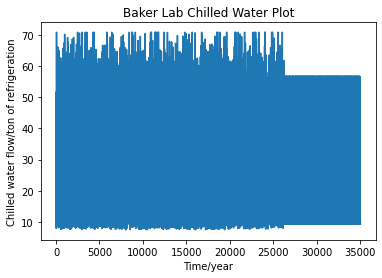

In [6]:
slottime = b1_data.index
slotavg = b1_data["Equipment Electric Power [kWh]"]
plt.title('Baker Lab Chilled Water Plot')
plt.xlabel('Time/year')
plt.ylabel('Chilled water flow/ton of refrigeration')
plt.plot(slottime, slotavg)
plt.xticks(ticks=['2016-06-01 00:00:00','2017-06-01 00:00:00','2018-06-01 00:00:00','2019-06-01 00:00:00'], labels=['2016', '2017', '2018', '2019'])